In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import joblib
from src.data_process import process_features_dataframe, bias_removal, negative_to_zero

plt.style.use('fivethirtyeight')


In [8]:
df = pd.read_pickle('data/ec_forecast_eval.pickle')
model = joblib.load('model/model.joblib')

In [19]:
forecast = {}
for date in df.columns:
    X = df.loc['fc', date]
    X = process_features_dataframe(X)
    pred = model.predict(X)
    pred = negative_to_zero(pred)
    pred = pd.Series(pred, X.index, name='generation')
    pred = bias_removal(pred)
    forecast[date] = pred

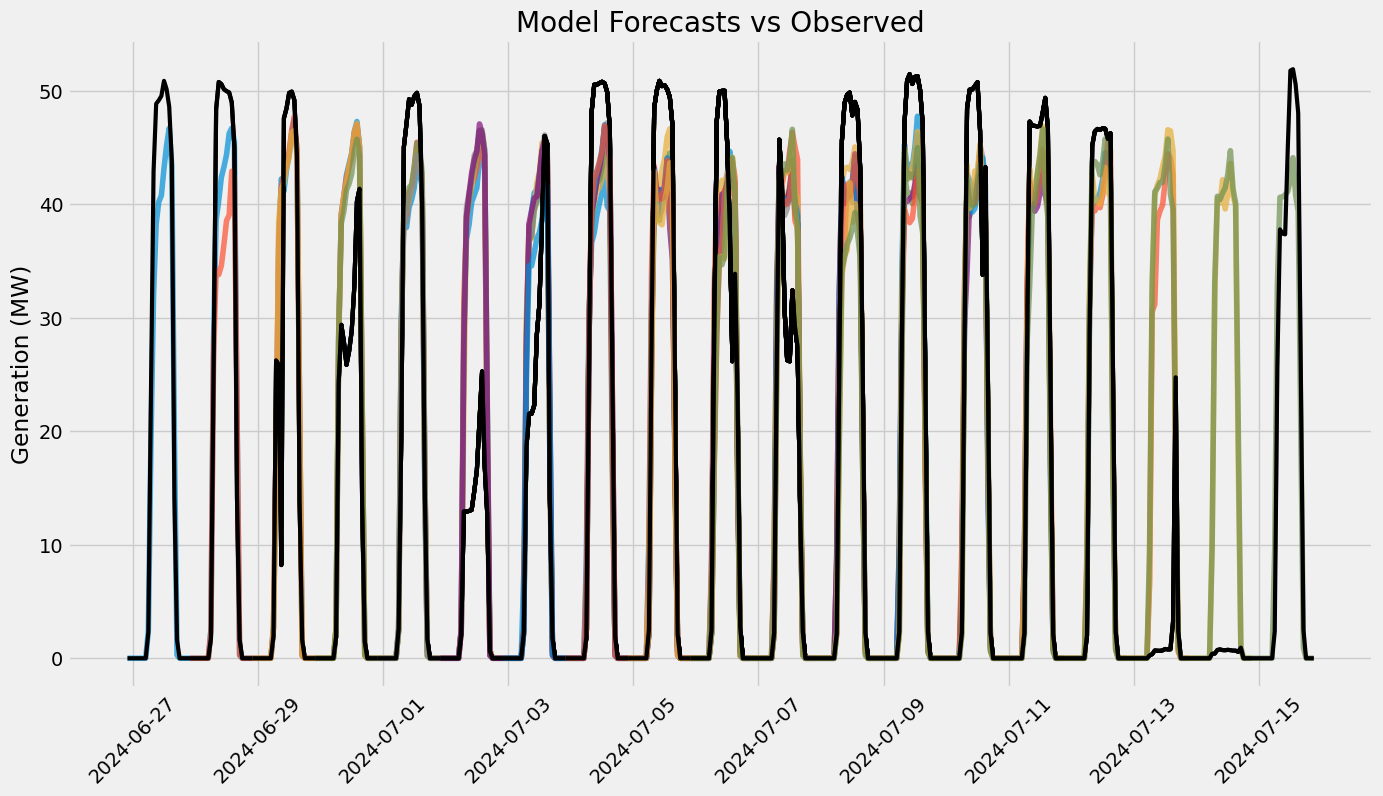

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
for c in df.columns[-60:-50]:
  ax.plot(forecast[c], alpha = 0.7)
  ax.plot(df.loc['obs', c], color = 'k', lw=3)

plt.ylabel('Generation (MW)')
plt.title('Model Forecasts vs Observed')
plt.xticks(rotation=45)
plt.savefig('imgs/eval/forecasts_vs_obs_model_eval.jpg')
plt.show()

In [21]:
maes = []
maes_d = []
maes_7d = []
for c in df.columns:
  maes.append(mean_absolute_error(df.loc['obs', c], forecast[c]))
  maes_d.append(mean_absolute_error(df.loc['obs', c].resample('D').mean()[1:],forecast[c].resample('D').mean()[1:]))
  maes_7d.append(mean_absolute_error(df.loc['obs', c].resample('7D').mean(),forecast[c].resample('7D').mean()))

In [22]:
print('MAE (hour)', sum(maes)/len(maes))
print('MAE (daily)', sum(maes_d)/len(maes_d))
print('MAE (weekly)', sum(maes_7d)/len(maes_7d))

MAE (hour) 4.647415656669688
MAE (daily) 3.1998842749063954
MAE (weekly) 2.0876511683854755
